In [28]:
using BasisFunctions
using FrameFuns
using PyPlot
using Interact, Reactive

### 1D - Prolate Spheroidal Wave Sequences

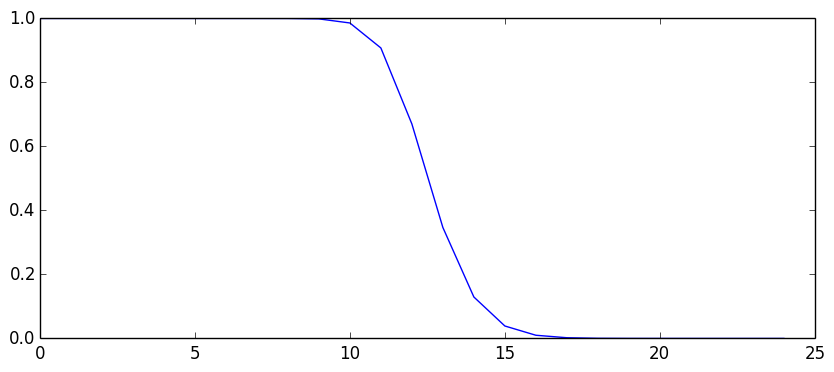

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e1b2f90>

In [34]:
figure(figsize=(10,4))
D = Interval(-0.5,0.5)
B = FourierBasis(25)
F = Fun(x->x,B,D)
USV = svd(matrix(F))
PyPlot.plot(USV[2])

Interact.Slider{Int64}([Reactive.Input{Int64}] 13,"i",13,1:25)

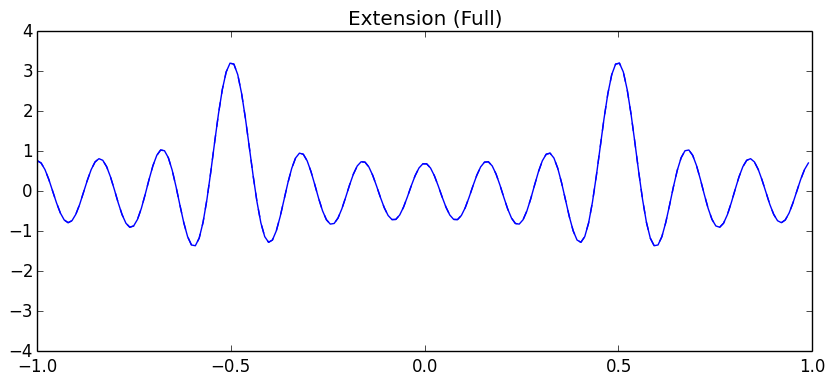

In [35]:
h = figure(figsize=(10,4))
@manipulate for i=1:length(USV[2]); withfig(h) do
        F = FrameFun(D,B,USV[3][:,i])
        plot_expansion(F)
        ylim([-4,4])
    end
end

### 2D - General Domain Equivalents

In [36]:
D2 = Mandelbrot()
B2 = FourierBasis(15,-1.0,0.35)⊗FourierBasis(15,-0.65,0.65)
F2 = Fun((x,y)->x+y,B2,D2)

A 2-dimensional FrameFun with 225 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.0  ,  0.35 ] x Fourier series, mapped to [ -0.65  ,  0.65 ])
Domain: The Mandelbrot set


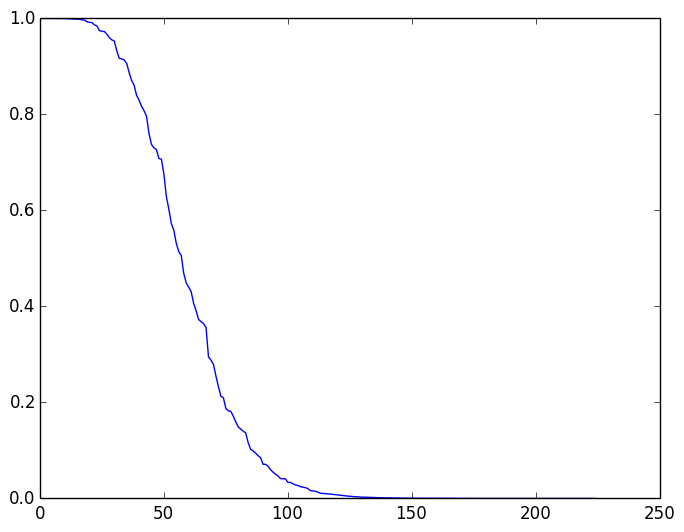

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322059310>

In [37]:
USV2=svd(matrix(F2))
PyPlot.plot(USV2[2])

Interact.Slider{Int64}([Reactive.Input{Int64}] 113,"i",113,1:225)

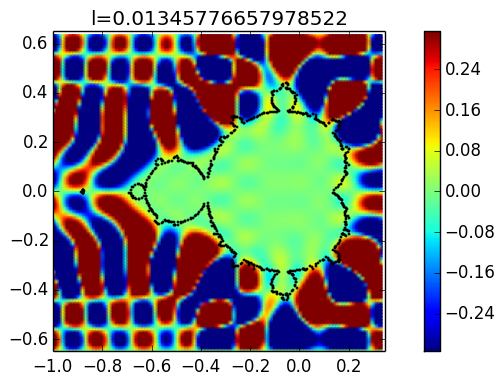

In [33]:
h2 = figure(figsize=(10,4))
n = length(USV2[2])
@manipulate for i=1:n; withfig(h2) do
        F2 = FrameFun(D2,B2,reshape(USV2[3][:,i],round(Int,sqrt(n)),round(Int,sqrt(n))))
        plot_image(F2,n=101)
        title("l=$(USV2[2][i])")
    end
end